In [1]:
# Importando todas as bibliotecas utilizadas
import pandas as pd 
from sklearn.model_selection import train_test_split 

from sklearn import preprocessing as pre
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import numpy as np

import pickle

In [2]:
# Criando o dataframe.
df = pd.read_csv('precificacao_alugueis_ny.csv')

In [3]:
# Descartando informações pessoais que a priore não serão utilizadas para predição.
df = df.drop(['nome', 'host_name', 'id', 'host_id', 'ultima_review'], axis=1) # se der errado pode ser a ordem das colunas.

# Número de instacias diferentes em features do tipo object.

mp = {title: index for index, title in enumerate(df['bairro_group'].unique())}
df['bairro_group'] = df['bairro_group'].map(mp)
mp = {title: index for index, title in enumerate(df['bairro'].unique())}
df['bairro'] = df['bairro'].map(mp)
mp = {title: index for index, title in enumerate(df['room_type'].unique())}
df['room_type'] = df['room_type'].map(mp)

df.dropna(inplace=True)

In [4]:
# Separando as variaveis
y = df['price'] # variavel alvo.
X = df.drop(['price'], axis=1) # variavel preditiva.

In [5]:
with open ('dados_entrada.pkl', 'wb') as arquivo: 
    pickle.dump(X, arquivo)

In [6]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, train_size=0.7) # realizando a distrbuição que ficara 70% para treino e 30 para testes.

In [7]:
# Com pre processamento

X_treino_pre = pre.MinMaxScaler().fit_transform(X_treino)
X_teste_pre = pre.MinMaxScaler().fit_transform(X_teste)

scaler = StandardScaler()
X_treino_sca = scaler.fit_transform(X_treino)
X_teste_sca = scaler.fit_transform(X_teste)

In [8]:
reg = LinearRegression().fit(X_treino, y_treino)
reg_pre = LinearRegression().fit(X_treino_pre, y_treino)
reg_sca = LinearRegression().fit(X_treino_sca, y_treino)

In [9]:
# Avaliando o erro.
y_predicao = reg.predict(X_teste)
y_predicao_pre = reg_pre.predict(X_teste_pre)
y_predicao_sca = reg_pre.predict(X_teste_sca)

print('\n-------- Sem Pré-Processamento ---------------\n')
print('Média do erro Absoluto: ', mean_absolute_error (y_teste, y_predicao))
print('MSE: ', mean_squared_error (y_teste, y_predicao))

print('\n-------- Dados Pré-Processados ---------------\n')
print('MinMaxScaler')
print('Média do erro Absoluto: ',mean_absolute_error (y_teste, y_predicao_pre))
print('MSE: ',mean_squared_error (y_teste, y_predicao_pre))

print('StandardScaler')
print('Média do erro Absoluto: ',mean_absolute_error (y_teste, y_predicao_pre))
print('MSE: ',mean_squared_error (y_teste, y_predicao_pre))

# O que esta sendo analizado é o aumento do erro, se o erro aumentar o modelo piorou.


-------- Sem Pré-Processamento ---------------

Média do erro Absoluto:  61.512802277353735
MSE:  32040.14235270274

-------- Dados Pré-Processados ---------------

MinMaxScaler
Média do erro Absoluto:  61.04066263650056
MSE:  32036.879698088105
StandardScaler
Média do erro Absoluto:  61.04066263650056
MSE:  32036.879698088105


In [10]:
df.head()

,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,0,0,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,1,2,40.68514,-73.95976,0,89,1,270,4.64,1,194
3,0,3,40.79851,-73.94399,0,80,10,9,0.10,1,0
4,0,4,40.74767,-73.97500,0,200,3,74,0.59,1,129
5,1,5,40.68688,-73.95596,1,60,45,49,0.40,1,0


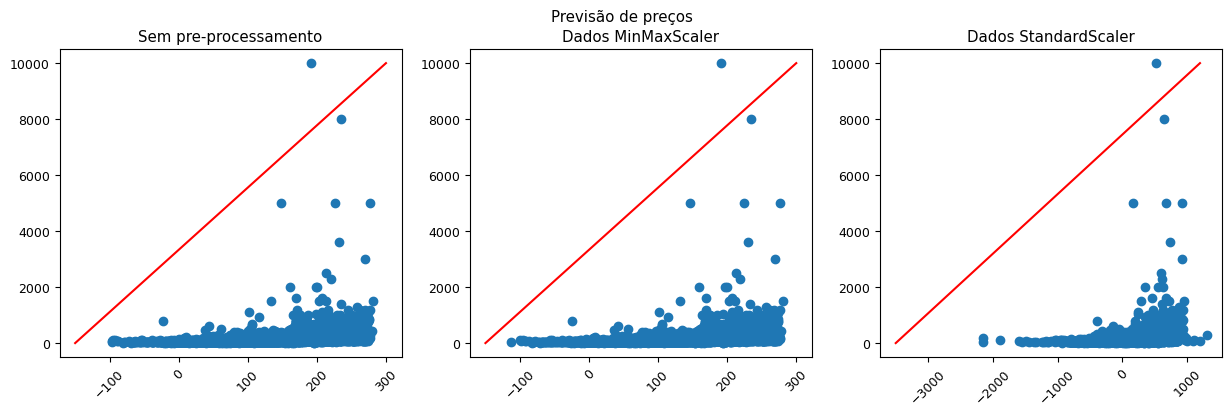

In [11]:
plt.figure(figsize=(15, 4))
plt.rcParams.update({'font.size':9})


plt.subplot(131)
plt.scatter(y_predicao,y_teste)
plt.plot([-150,300], [1,10000], color='red')
plt.xticks(rotation=45)
plt.title('Sem pre-processamento')

plt.subplot(132)
plt.scatter(y_predicao_pre,y_teste)
plt.plot([-150,300], [1,10000], color='red')
plt.xticks(rotation=45)
plt.title('Dados MinMaxScaler')

plt.subplot(133)
plt.scatter(y_predicao_sca,y_teste)
plt.plot([-3500,1200], [1,10000], color='red')
plt.xticks(rotation=45)
plt.title('Dados StandardScaler')



plt.suptitle('Previsão de preços')
plt.show()

In [12]:
# y_teste = np.array(y_teste)
# diferencas = []
# for i in range(len(y_teste)):
#     diferencas.append([y_teste[i]-y_predicao[i], y_teste[i]-y_predicao_pre[i], y_teste[i]-y_predicao_sca[i]])   
    
# diferencas
# print(y_teste,'\n')
# print(y_predicao,'\n')
# print(y_predicao_pre,'\n')
# print(y_predicao_sca,'\n')
# print(len(y_teste),len(y_predicao))
# type(teste)

In [13]:
with open('modelo.pkl', 'wb') as arquivo:
    pickle.dump(reg_pre, arquivo)